In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train=pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')
test=pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv')


In [3]:
test.shape

(3, 2)

In [4]:
train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [5]:
train['full_text'][0]

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but\xa0If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states an

In [6]:
train.describe()

,score
count,17307.000000
mean,2.948402
std,1.044899
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


<Axes: >

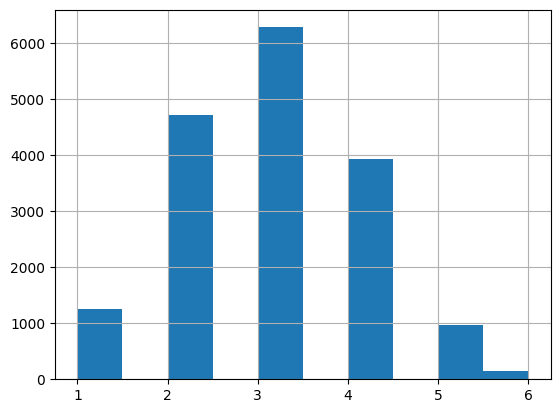

In [7]:
train.score.hist()

In [8]:
X=train['full_text']
y=train.score

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer()
X_transformed=vect.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((13845, 64574), (3462, 64574))

# I want to fit a model but by nature this is a sparse matrix. lets select important features using  LGBM model

In [12]:
from catboost import CatBoostClassifier

In [13]:
lgb=CatBoostClassifier()
lgb.fit(X_train.astype(np.float32), y_train)

Learning rate set to 0.090475
0:	learn: 1.6970983	total: 952ms	remaining: 15m 51s
1:	learn: 1.6288339	total: 1.65s	remaining: 13m 41s
2:	learn: 1.5675381	total: 2.33s	remaining: 12m 55s
3:	learn: 1.5210935	total: 2.89s	remaining: 11m 59s
4:	learn: 1.4755350	total: 3.52s	remaining: 11m 40s
5:	learn: 1.4358157	total: 4.17s	remaining: 11m 30s
6:	learn: 1.4012819	total: 4.77s	remaining: 11m 17s
7:	learn: 1.3718697	total: 5.42s	remaining: 11m 12s
8:	learn: 1.3454180	total: 6.03s	remaining: 11m 4s
9:	learn: 1.3197987	total: 6.76s	remaining: 11m 9s
10:	learn: 1.2967233	total: 7.35s	remaining: 11m
11:	learn: 1.2775839	total: 7.97s	remaining: 10m 56s
12:	learn: 1.2580811	total: 8.62s	remaining: 10m 54s
13:	learn: 1.2419307	total: 9.21s	remaining: 10m 48s
14:	learn: 1.2291752	total: 9.79s	remaining: 10m 42s
15:	learn: 1.2156622	total: 10.4s	remaining: 10m 42s
16:	learn: 1.2022160	total: 11.1s	remaining: 10m 40s
17:	learn: 1.1907347	total: 11.6s	remaining: 10m 35s
18:	learn: 1.1806904	total: 12.2

In [14]:
from sklearn.metrics import accuracy_score
preds=lgb.predict(X_test.astype(np.float32))
accuracy_score(y_test, preds)

0.5849220103986135

In [15]:
submission=test.copy()

In [16]:
submission.shape, test.shape

((3, 2), (3, 2))

In [17]:
textcount=vect.transform(submission['full_text'])

In [18]:
preds=lgb.predict(textcount.astype(np.float32))

In [19]:
preds.shape

(3, 1)

In [20]:
submission['full_text']=preds

In [21]:
submission

,essay_id,full_text
0,000d118,3
1,000fe60,3
2,001ab80,4


In [22]:
submission.to_csv('submission.csv', index=False)